# Rasheed Hameed
# Final Project - Online Shoppers Purchasing Intention
__http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#__



__Information taken from website above__


__Data Set Information:
The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session 
would belong to a different user in a 1-year period to avoid 
any tendency to a specific campaign, special day, user 
profile, or period.__ 

__The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label.__

__"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.__

In [1]:
#Loading libraries

import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
#to suppresss the orange warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


*feature engineering, where true and false will be converted to 0 or 1*

In [3]:
df.Weekend.replace([True, False], [1,0], inplace=True)

In [4]:
df.Revenue.replace([True, False], [1,0], inplace=True)

__Data Exploration__

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330,NaN,NaN,NaN,2.31517,3.32178,0,0,1,4,27
Administrative_Duration,12330,NaN,NaN,NaN,80.8186,176.779,0,0,7.5,93.2562,3398.75
Informational,12330,NaN,NaN,NaN,0.503569,1.27016,0,0,0,0,24
Informational_Duration,12330,NaN,NaN,NaN,34.4724,140.749,0,0,0,0,2549.38
ProductRelated,12330,NaN,NaN,NaN,31.7315,44.4755,0,7,18,38,705
ProductRelated_Duration,12330,NaN,NaN,NaN,1194.75,1913.67,0,184.137,598.937,1464.16,63973.5
BounceRates,12330,NaN,NaN,NaN,0.0221914,0.0484883,0,0,0.00311247,0.0168126,0.2
ExitRates,12330,NaN,NaN,NaN,0.0430728,0.0485965,0,0.0142857,0.0251564,0.05,0.2
PageValues,12330,NaN,NaN,NaN,5.88926,18.5684,0,0,0,0,361.764
SpecialDay,12330,NaN,NaN,NaN,0.0614274,0.198917,0,0,0,0,1


*Columns Month, VisitorType seems to have text values that do not translate well with describe profiler.  Dummies will be used to convert these categoricals to numericals*

In [6]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

__These features below with the histograms in blue represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.  The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.__

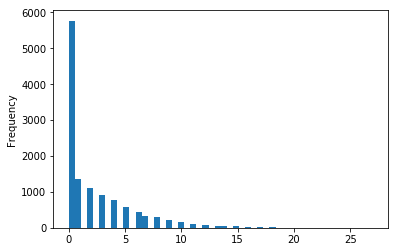

In [7]:
df.Administrative.plot(kind="hist", bins=50)

*majority of the data falls near the between 1 and 10*

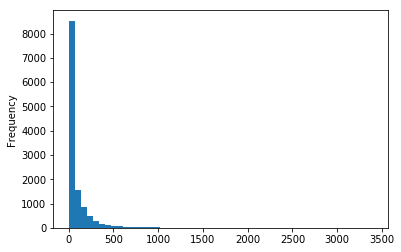

In [8]:
df.Administrative_Duration.plot(kind="hist", bins=50)

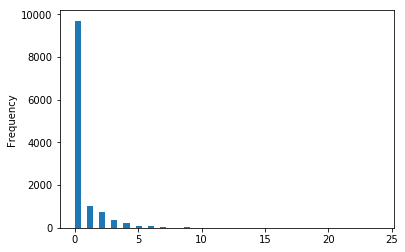

In [9]:
df['Informational'].plot(kind="hist", bins=50)

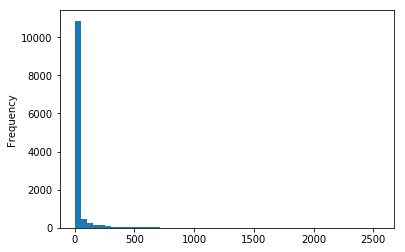

In [10]:
df.Informational_Duration.plot(kind="hist", bins=50)

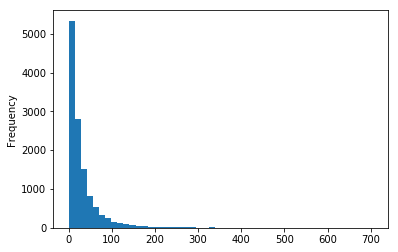

In [11]:
df.ProductRelated.plot(kind="hist", bins=50)

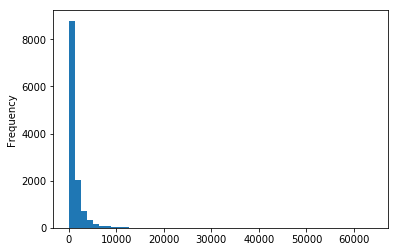

In [12]:
df.ProductRelated_Duration.plot(kind="hist", bins=50)

__The features in red histograms represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.__

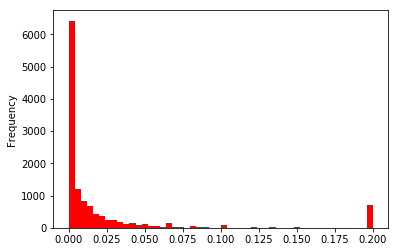

In [13]:
df.BounceRates.plot(kind="hist", bins=50,color='red')

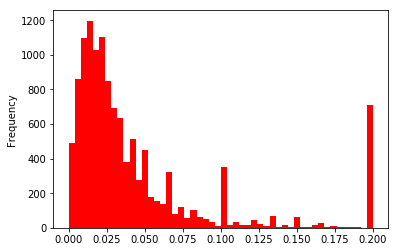

In [14]:
df.ExitRates.plot(kind="hist", bins=50,color='red')

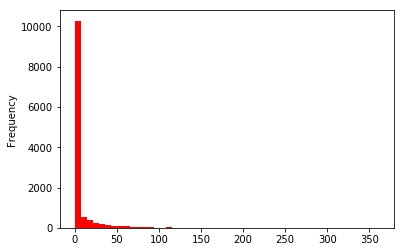

In [15]:
df.PageValues.plot(kind="hist", bins=50,color='red')

__The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8__

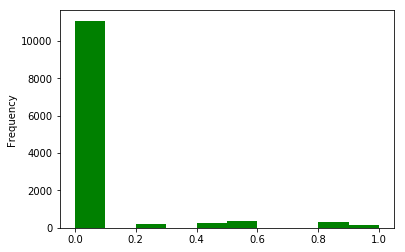

In [16]:
df.SpecialDay.plot(kind="hist", color='green')

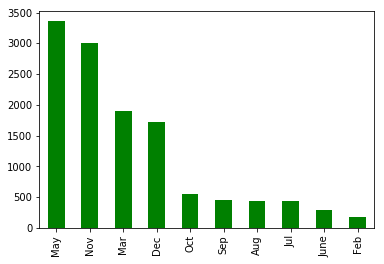

In [17]:
df['Month'].value_counts().plot(kind='bar', color='green')

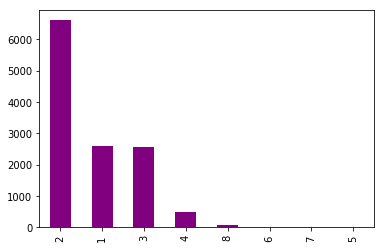

In [18]:
df['OperatingSystems'].value_counts().plot(kind='bar', color='purple')

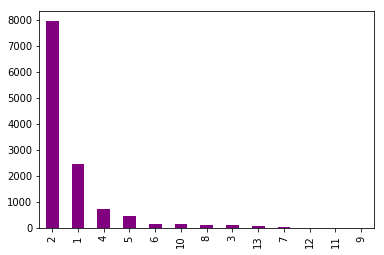

In [19]:
df['Browser'].value_counts().plot(kind='bar', color='purple')

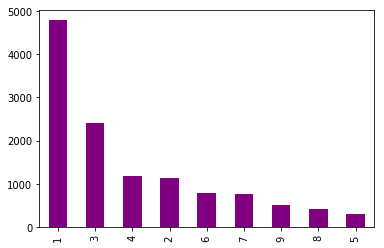

In [20]:
df['Region'].value_counts().plot(kind='bar', color='purple')

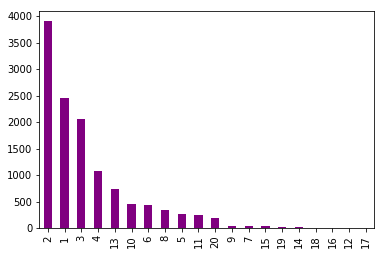

In [21]:
df['TrafficType'].value_counts().plot(kind='bar', color='purple')

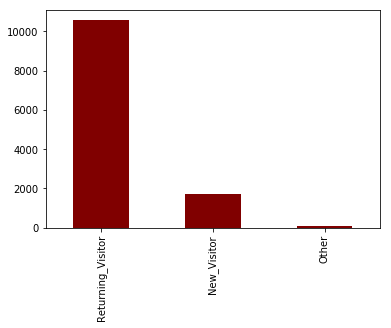

In [22]:
df['VisitorType'].value_counts().plot(kind='bar', color='maroon')

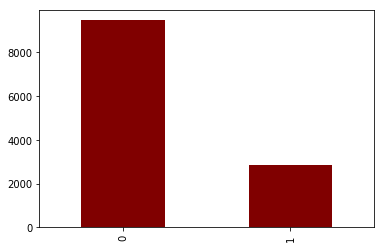

In [23]:
df['Weekend'].value_counts().plot(kind='bar', color='maroon')

In [24]:
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

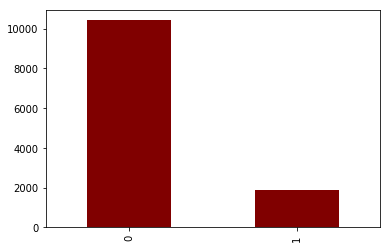

In [25]:
df.Revenue.value_counts().plot(kind='bar', color='maroon')

In [26]:
gg = pd.crosstab(df.Weekend, df.Revenue)
gg


Revenue,0,1
Weekend,,
0,8053,1409
1,2369,499


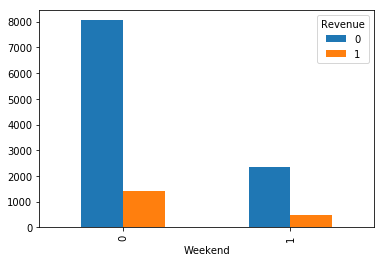

In [27]:
plt.show(gg.plot(kind="bar"))

*From above plot we can say that the Weekend Online browser don't end up complete their shopping by purchasing*

In [28]:
gg = pd.crosstab(df['VisitorType'], df["Revenue"])
gg

Revenue,0,1
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9081,1470


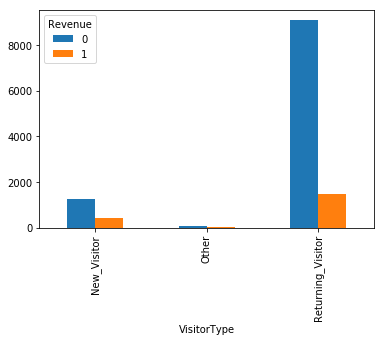

In [29]:
plt.show(gg.plot(kind="bar"))

In [30]:
df_numeric = pd.get_dummies(df[[ 'Month', 'VisitorType']])

In [31]:
df_numeric.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,1


In [32]:
df_new = pd.concat([df, df_numeric],axis=1)

In [33]:
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_new.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

# Clustering#

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
data = df_new
#X_train = df_new[['Administrative', 'Administrative_Duration', 'Informational',
 #      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
  #     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
   #     'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb',
    #   'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
     #  'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
      # 'VisitorType_Other', 'VisitorType_Returning_Visitor'  ]]
X_train = df_new[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
        'Weekend',  'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'  ]]
target = df_new['Revenue']

In [109]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

In [110]:
train = min_max_scaler.transform(X_train)

In [111]:
kmeans = KMeans(n_clusters=3, max_iter=500, verbose=1) # initialization

In [113]:
kmeans.fit(train)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4927.227635456993
start iteration
done sorting
end inner loop
Iteration 1, inertia 4914.026103644022
start iteration
done sorting
end inner loop
Iteration 2, inertia 4913.9547956529195
start iteration
done sorting
end inner loop
Iteration 3, inertia 4913.9547956529195
center shift 0.000000e+00 within tolerance 4.379494e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4940.975810876656
start iteration
done sorting
end inner loop
Iteration 1, inertia 4913.9547956529195
start iteration
done sorting
end inner loop
Iteration 2, inertia 4913.9547956529195
center shift 0.000000e+00 within tolerance 4.379494e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4918.389799881922
start iteration
done sorting
end inner loop
Iteration 1, inertia 4913.983064058696
start iteration
done sorting
end inner loop
Iteration 2, inertia 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [114]:
clusters = kmeans.predict(train)

In [115]:
print(clusters)

[0 0 0 ... 2 0 1]


In [116]:
centroids = kmeans.cluster_centers_

In [117]:
np.set_printoptions(precision=5,suppress=True)
print (centroids)

[[ 0.08248  0.0228   0.02092  0.01362  0.04739  0.01987  0.13113  0.24186
   0.01324  0.06991  0.15859  0.1124   0.26218  0.15924  0.      -0.
   0.00232  0.99768]
 [ 0.09381  0.02701  0.01376  0.00745  0.02554  0.01002  0.02564  0.1044
   0.03116  0.01951  0.16861  0.13016  0.30355  0.17171  0.27325  0.96634
   0.03366  0.     ]
 [ 0.09102  0.02476  0.02648  0.01763  0.05115  0.02093  0.10442  0.20597
   0.01577  0.06312  0.16145  0.10294  0.26402  0.16206  1.      -0.
   0.00293  0.99707]]


In [119]:
traincol=[]
for key,value in X_train.iteritems():
    traincol.append(key)

In [120]:
print ("Name\t\t\t\tCluster 0\tCluster 1\tCluster 2")
for i in range((X_train.shape[1])):
    print ("{:30}\t{:.8f}\t{:.8f}\t{:.8f}".format(traincol[i],centroids[0][i],centroids[1][i], centroids[2][i]))

Name				Cluster 0	Cluster 1	Cluster 2
Administrative                	0.08248295	0.09380744	0.09101902
Administrative_Duration       	0.02280278	0.02700682	0.02475596
Informational                 	0.02092493	0.01376212	0.02647551
Informational_Duration        	0.01362484	0.00744666	0.01762698
ProductRelated                	0.04738607	0.02554486	0.05114517
ProductRelated_Duration       	0.01987195	0.01002181	0.02092542
BounceRates                   	0.13112934	0.02563967	0.10442244
ExitRates                     	0.24186263	0.10439699	0.20596854
PageValues                    	0.01324014	0.03116348	0.01577388
SpecialDay                    	0.06990718	0.01950941	0.06312265
OperatingSystems              	0.15859446	0.16860892	0.16145428
Browser                       	0.11240026	0.13015782	0.10293707
Region                        	0.26218246	0.30355106	0.26402260
TrafficType                   	0.15923817	0.17170565	0.16205856
Weekend                       	0.00000000	0.27324586	1.00000000
Vi

In [121]:
from sklearn.metrics import completeness_score, homogeneity_score
print("Completeness Score: ",completeness_score(target,clusters))
print("Homogeneity: ",homogeneity_score(target,clusters))


Completeness Score:  0.006623159625003021
Homogeneity:  0.013330362977631178


In [37]:
X_train.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,1,2,0,0,0,1


In [38]:
X_train.shape

(12330, 18)

In [39]:
target.head(3)

0    0
1    0
2    0
Name: Revenue, dtype: int64

In [40]:
kmeans = KMeans(n_clusters=3, max_iter=500, verbose=1) # initialization

In [42]:
kmeans.fit(X_train)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 14042969302.18078
start iteration
done sorting
end inner loop
Iteration 1, inertia 13524969984.847483
start iteration
done sorting
end inner loop
Iteration 2, inertia 13372099444.762133
start iteration
done sorting
end inner loop
Iteration 3, inertia 13309110625.005157
start iteration
done sorting
end inner loop
Iteration 4, inertia 13275639704.671402
start iteration
done sorting
end inner loop
Iteration 5, inertia 13256232640.501944
start iteration
done sorting
end inner loop
Iteration 6, inertia 13247060984.470058
start iteration
done sorting
end inner loop
Iteration 7, inertia 13243409936.226824
start iteration
done sorting
end inner loop
Iteration 8, inertia 13241478124.627565
start iteration
done sorting
end inner loop
Iteration 9, inertia 13240356875.216295
start iteration
done sorting
end inner loop
Iteration 10, inertia 13238996331.816917
start iteration
done sorting
end inner loop
Iteratio

Iteration 8, inertia 13976638100.121752
start iteration
done sorting
end inner loop
Iteration 9, inertia 13866717361.510885
start iteration
done sorting
end inner loop
Iteration 10, inertia 13738910534.292097
start iteration
done sorting
end inner loop
Iteration 11, inertia 13608133822.703386
start iteration
done sorting
end inner loop
Iteration 12, inertia 13514929439.608423
start iteration
done sorting
end inner loop
Iteration 13, inertia 13424957030.807142
start iteration
done sorting
end inner loop
Iteration 14, inertia 13367822403.157427
start iteration
done sorting
end inner loop
Iteration 15, inertia 13316147453.720247
start iteration
done sorting
end inner loop
Iteration 16, inertia 13290280112.190224
start iteration
done sorting
end inner loop
Iteration 17, inertia 13268115286.62183
start iteration
done sorting
end inner loop
Iteration 18, inertia 13252545510.74924
start iteration
done sorting
end inner loop
Iteration 19, inertia 13231341362.20189
start iteration
done sorting


Iteration 29, inertia 13215631853.584427
start iteration
done sorting
end inner loop
Iteration 30, inertia 13215330388.528248
start iteration
done sorting
end inner loop
Iteration 31, inertia 13215092635.470264
start iteration
done sorting
end inner loop
Iteration 32, inertia 13214910623.216595
start iteration
done sorting
end inner loop
Iteration 33, inertia 13214906623.383776
center shift 8.433659e-01 within tolerance 2.064029e+01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 13863917297.467533
start iteration
done sorting
end inner loop
Iteration 1, inertia 13674674351.2489
start iteration
done sorting
end inner loop
Iteration 2, inertia 13558025112.630428
start iteration
done sorting
end inner loop
Iteration 3, inertia 13455347453.957447
start iteration
done sorting
end inner loop
Iteration 4, inertia 13390296515.80484
start iteration
done sorting
end inner loop
Iteration 5, inertia 13330316494.172443
start iteration
done sorting
end inner

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [100]:
clusters = kmeans.predict(X_train)

In [101]:
print(clusters     )

[0 0 0 ... 0 0 0]


In [102]:
centroids = kmeans.cluster_centers_

In [103]:
target.shape

(12330,)

In [104]:
centroids.shape

(3, 18)

In [105]:
np.set_printoptions(precision=5,suppress=True)
print (centroids)

[[    1.81983    62.04119     0.32732    19.96891    18.60684   576.33605
      0.02546     0.04772     5.49487     0.06414     2.12074     2.36744
      3.16903     4.14902     0.23487     0.1575      0.00788     0.83461]
 [    4.32069   154.7208      1.17299    84.58696    77.68842  3353.70624
      0.00713     0.02167     8.05648     0.05068     2.13809     2.30905
      3.09509     3.70916     0.21902     0.04805     0.00202     0.94992]
 [    7.43961   295.36489     2.74879   266.72309   236.10628 10886.17437
      0.00594     0.01969     4.52137     0.03092     2.14976     2.30918
      2.58454     3.61836     0.25121     0.00483     0.00483     0.99034]]


In [106]:
traincol=[]
for key,value in X_train.iteritems():
    traincol.append(key)

In [107]:
print ("Name\t\t\t\tCluster 0\tCluster 1\tCluster 2")
for i in range((X_train.shape[1])):
    print ("{:30}\t{:.8f}\t{:.8f}\t{:.8f}".format(traincol[i],centroids[0][i],centroids[1][i], centroids[2][i]))

Name				Cluster 0	Cluster 1	Cluster 2
Administrative                	1.81983048	4.32068791	7.43961353
Administrative_Duration       	62.04119025	154.72079884	295.36489079
Informational                 	0.32732111	1.17298938	2.74879227
Informational_Duration        	19.96891008	84.58696216	266.72309447
ProductRelated                	18.60684013	77.68841679	236.10628019
ProductRelated_Duration       	576.33604946	3353.70624215	10886.17436548
BounceRates                   	0.02545759	0.00713076	0.00593976
ExitRates                     	0.04772076	0.02166782	0.01968831
PageValues                    	5.49487216	8.05647591	4.52137028
SpecialDay                    	0.06414350	0.05068285	0.03091787
OperatingSystems              	2.12073724	2.13808801	2.14975845
Browser                       	2.36743544	2.30905412	2.30917874
Region                        	3.16903213	3.09509358	2.58454106
TrafficType                   	4.14902425	3.70915529	3.61835749
Weekend                       	0.23487089	0.

In [108]:
from sklearn.metrics import completeness_score, homogeneity_score
print("Completeness Score: ",completeness_score(target,clusters))
print("Homogeneity: ",homogeneity_score(target,clusters))


Completeness Score:  0.015934804648042894
Homogeneity:  0.01932075812691264


In [ ]:
print(train.shape)
print(test.shape)
print(target_train.shape)
print(target_test.shape)

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(train)

In [ ]:
from sklearn.model_selection import train_test_split
train, test, target_train, target_test = train_test_split(X_train, target, test_size = 0.2, random_state = 33)

In [ ]:
test.shape

In [ ]:
train_norm = min_max_scaler.transform(train)
test_norm = min_max_scaler.transform(test)

In [ ]:
print(test_norm)

In [ ]:
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#KNN
nn = 5
knnclf = neighbors.KNeighborsClassifier(nn, weights = 'distance')
knnclf.fit(train_norm, target_train)
knnpreds_test = knnclf.predict(test_norm)
print(knnpreds_test)

In [ ]:
print(classification_report(target_test, knnpreds_test))

In [ ]:
knncm = confusion_matrix(target_test, knnpreds_test)


In [ ]:
plt.matshow(knncm, cmap = plt.cm.Reds, alpha=0.6)
plt.title("KNN Confusion Matrix\n")
plt.xticks([0,1], ['False', 'True'])
plt.yticks([0,1], ['False', 'True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
for y in range(knncm.shape[0]):
    for x in range(knncm.shape[1]):
        plt.text(x, y, '{}'.format(knncm[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [ ]:
#accuracy score on the training data
print ('Test to see accuracy on training:', knnclf.score(train_norm, target_train))
print ('Accuracy score is: ', knnclf.score(test_norm, target_test))

In [ ]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(train, target_train)

In [ ]:
treepreds_test=treeclf.predict(test)

In [ ]:
print(classification_report(target_test, treepreds_test))

In [ ]:
treecm = confusion_matrix(target_test, treepreds_test)

In [ ]:
plt.matshow(treecm, cmap = plt.cm.Greens, alpha=0.6)
plt.title("TreeCLF Confusion Matrix\n")
plt.xticks([0,1], ['False', 'True'])
plt.yticks([0,1], ['False', 'True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
for y in range(treecm.shape[0]):
    for x in range(treecm.shape[1]):
        plt.text(x, y, '{}'.format(treecm[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [ ]:
#accuracy score on the training data
print ('Test to see accuracy on training:', treeclf.score(train, target_train))
print ('Accuracy score is: ', treeclf.score(test, target_test))